In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_style('darkgrid')

In [3]:
# Load  the data
sec_post_1d_df = pd.read_pickle(r'/Users/tiancaixiaohuoban/Desktop/实习/买方实习/中信建投期货（金融工程）/策略设计/dom_cont_post_1d')
# sec_post_1d_df

In [4]:
univ01 = ['AG', 'AL', 'NI', 'ZN',
          'RB', 'HC', 'I', 'J', 'JM', 'FG',
          'BU', 'L', 'MA', 'PP', 'RU', 'V', 'TA', 'FU', 'EG', 'SP',
          'A', 'M', 'P', 'OI', 'Y', 'SR', 'CF', 'C', 'RM']

univ02 = ['AG', 'AL', 'NI', 'ZN',
          'RB', 'HC', 'I', 'J', 'JM', 'FG',
          'BU', 'L', 'MA', 'PP', 'RU', 'V', 'TA', 'FU', 'EG', 'SP',
          'A', 'M', 'P', 'OI', 'Y', 'SR', 'CF', 'C', 'RM', 'CU', 'PB', 'SN', 'SF', 'SM', 'AP', 'SA']

univ_nonferrous = ['CU', 'AL', 'NI', 'ZN', 'PB', 'SN']
univ_black = ['RB', 'I', 'HC', 'J', 'JM', 'FG', 'SF', 'SM', 'SA']
univ_chemic = ['FU', 'BU', 'RU', 'L', 'TA', 'V', 'EG', 'MA', 'PP']
univ_agri = ['A', 'AP', 'C', 'CF', 'CS', 'JD', 'M', 'OI', 'P', 'RM', 'SR', 'Y']
univ_precious = ['AU', 'AG']

In [5]:
def load_data(univ, sec_post_1d_df):
    # 从原始数据中提取出univ中的合约的收盘价数据
    data = pd.DataFrame()
    for contract in univ:
        df = sec_post_1d_df.loc[contract].T
        data[contract] = df['close']
    
    return data

In [6]:
prices = load_data(univ02, sec_post_1d_df)

In [7]:
prices

AG        AL        NI        ZN        RB        HC  \
date                                                                     
2010-01-04       NaN       NaN       NaN  1.000000  1.000000       NaN   
2010-01-05       NaN       NaN       NaN  1.010030  1.002184       NaN   
2010-01-06       NaN       NaN       NaN  1.014229  1.009391       NaN   
2010-01-07       NaN       NaN       NaN  1.013529  0.980345       NaN   
2010-01-08       NaN       NaN       NaN  0.989503  0.974449       NaN   
...              ...       ...       ...       ...       ...       ...   
2024-01-19  0.658773  1.583529  1.762632  1.124490  1.181434  5.507048   
2024-01-22  0.640947  1.586499  1.734943  1.125034  1.177511  5.502951   
2024-01-23  0.647743  1.584802  1.786051  1.135912  1.186564  5.530268   
2024-01-24  0.651420  1.614503  1.785914  1.155764  1.193505  5.572609   
2024-01-25  0.655653  1.600925  1.785088  1.162290  1.197126  5.595828   

                   I         J        JM        FG  ...        CF         C  \
date                                                ...                       
2010-01-04       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2010-01-05       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2010-01-06       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2010-01-07       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2010-01-08       NaN       NaN       NaN       NaN  ...       NaN       NaN   
...              ...       ...       ...       ...  ...       ...       ...   
2024-01-19  6.567857  3.134274  4.249630  2.152653  ...  0.757877  1.138714   
2024-01-22  6.533542  3.144525  4.226313  2.234694  ...  0.757163  1.128994   
2024-01-23  6.626192  3.180404  4.258957  2.215102  ...  0.759305  1.137256   
2024-01-24  6.718842  3.208595  4.320749  2.270204  ...  0.760257  1.139686   
2024-01-25  6.773746  3.195140  4.278777  2.264082  ...  0.760970  1.140658   

                  RM        CU        PB        SN        SF        SM  \
date                                                                     
2010-01-04       NaN  1.000000       NaN       NaN       NaN       NaN   
2010-01-05       NaN  1.009329       NaN       NaN       NaN       NaN   
2010-01-06       NaN  1.026653       NaN       NaN       NaN       NaN   
2010-01-07       NaN  1.018991       NaN       NaN       NaN       NaN   
2010-01-08       NaN  1.010995       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2024-01-19  2.581004  1.295807  1.529080  2.434512  1.362415  1.623028   
2024-01-22  2.555690  1.298484  1.528613  2.424057  1.354249  1.612400   
2024-01-23  2.560753  1.302308  1.559456  2.477241  1.351800  1.601772   
2024-01-24  2.587079  1.307470  1.557587  2.487794  1.367722  1.607339   
2024-01-25  2.559740  1.317031  1.524407  2.503227  1.375071  1.609364   

                  AP        SA  
date                            
2010-01-04       NaN       NaN  
2010-01-05       NaN       NaN  
2010-01-06       NaN       NaN  
2010-01-07       NaN       NaN  
2010-01-08       NaN       NaN  
...              ...       ...  
2024-01-19  1.324109  1.647384  
2024-01-22  1.298797  1.801152  
2024-01-23  1.321736  1.842617  
2024-01-24  1.316990  1.826204  
2024-01-25  1.300538  1.787330  

[3419 rows x 36 columns]

In [8]:
stocks = prices.columns
returns = prices.pct_change().dropna()
log_prices = np.log(prices)
log_returns = log_prices.diff().dropna()

In [9]:
# form_start = '2020-01-01'
# form_end = '2021-12-31'
# trade_start = '2022-01-01'
# trade_end = '2022-12-31'
# 
# prices_form = prices.loc[form_start:form_end]
# prices_trade = prices.loc[trade_start:trade_end]
# log_prices_form = log_prices.loc[form_start:form_end]
# log_prices_trade = log_prices.loc[trade_start:trade_end]
# log_returns_form = log_returns.loc[form_start:form_end]
# log_returns_trade = log_returns.loc[trade_start:trade_end]
# returns_form = returns.loc[form_start:form_end]
# returns_trade = returns.loc[trade_start:trade_end]

In [10]:
def Find_Cointegrated_Pairs(stocks):
    from itertools import combinations

    combs = []

    # 保存所有可能的二元组
    for c in combinations(stocks, 2):
        combs.append(c)

    # print(len(combs))
    # convert to dataframe
    combs = np.array(combs)
    combs = pd.DataFrame(combs, columns=['s1','s2'])
    index = list(combs.index)

    selected_pairs = []
    selected_stocks = []
    from tqdm import tqdm
    # 创建一个tqdm对象
    pbar = tqdm(total=len(index))

    while len(index)>0:
        i = random.choice(index) # 选择随机的两元组
        s1,s2 = combs.loc[i] # 根据选择的两元组解析出资产
        index.remove(i) # remove processed row

        try:
            res = coint_johansen(log_prices[[s1,s2]], det_order=0, k_ar_diff=1)
        except:
            continue

        if sum(res.lr2 > res.cvm[:,-2]) == 2: # if null is rejected at 95% level，若存在协整关系
            print(f'{s1}-{s2}')
            selected_pairs.append([s1,s2])
            selected_stocks.extend([s1,s2])

            # 移除包含已经被选择的资产的所有资产组合
            for s in [s1,s2]:
                for c in combs.columns:
                    combs = combs.loc[~(combs[c]==s)]
                    index = list(set(index).intersection(set(combs.index)))
        # 更新进度条
        pbar.update(1)
    # 关闭进度条
    pbar.close()
    return selected_pairs

In [11]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
log_prices = log_prices.dropna()
res = coint_johansen(log_prices[[stocks[0], stocks[1]]],det_order=0, k_ar_diff=1)

In [12]:
res.lr2

array([8.74888407, 2.61202344])

In [13]:
res.cvm

array([[12.2971, 14.2639, 18.52  ],
       [ 2.7055,  3.8415,  6.6349]])

In [14]:
res.cvm[:,-1]

array([18.52  ,  6.6349])

In [15]:
res.lr2 > res.cvm[:,-2]

array([False, False])

##  寻找存在协整关系的资产对，符合要求的资产对在统计水平上存在显著的协整关系（两个都为True）

In [16]:
selected_pairs = Find_Cointegrated_Pairs(stocks)

 11%|█▏        | 71/630 [00:00<00:01, 354.15it/s]

PP-C
L-PB
TA-Y
FU-SN
SF-AP
ZN-A


 32%|███▏      | 199/630 [00:00<00:01, 406.89it/s]

FG-MA
J-BU


 40%|████      | 253/630 [00:00<00:00, 388.89it/s]


In [17]:
selected_pairs

[['PP', 'C'],
 ['L', 'PB'],
 ['TA', 'Y'],
 ['FU', 'SN'],
 ['SF', 'AP'],
 ['ZN', 'A'],
 ['FG', 'MA'],
 ['J', 'BU']]

In [18]:
s1,s2 = selected_pairs[0]

In [19]:
res = coint_johansen(log_prices[[s1,s2]], det_order=0, k_ar_diff=1)

In [20]:
res.lr2 > res.cvm[:,-2]

array([ True,  True])

In [21]:
def Test_in_Sample(selected_pair,log_prices, returns, form_start,form_end):
    # form_start = '2020-01-01'
    # form_end = '2021-12-31'
    log_prices_form = log_prices.loc[form_start:form_end]
    returns_form = returns.loc[form_start:form_end]
    W = 126 # window size
    P = 4 # max lag parameter

    positions = pd.DataFrame(index=returns_form.index, columns=[s1,s2])

    for t in log_prices_form.index:
        # prepare data
        log_prices_tmp = log_prices.loc[:t]
        log_prices_tmp = log_prices_tmp.iloc[-W:]
        log_returns_tmp = log_returns.loc[:t]
        log_returns_tmp = log_returns_tmp.dropna().iloc[-W:]
        # print(len(log_prices_tmp))
        
        if(len(log_prices_tmp)<W):
            continue

        # estimate cointegration vector
        res = coint_johansen(log_prices_tmp[[s1,s2]], det_order=0, k_ar_diff=1)
        b = res.evec[:,0] # cointegration vector

        # calculate spread
        Z = (b * log_returns_tmp[[s1,s2]]).sum(axis=1)
        spread = Z.rolling(P).sum()

        # calculate weights
        weights = res.evec[:,0]
        weights[weights>0] /= sum(weights[weights>0])
        weights[weights<0] /= sum(abs(weights[weights<0]))

        if spread.iloc[-1] > 0:
            positions.loc[t] = -weights
        else:
            positions.loc[t] = weights
    return positions

## 样本内检验

In [22]:
positions = Test_in_Sample(selected_pairs[0],log_prices, returns, '2020-01-01','2021-12-31')
positions = positions.fillna(0)
s1, s2 = selected_pairs[0]

/var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/ipykernel_93477/846072194.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  positions = positions.fillna(0)


In [23]:
ret_is = (positions.shift() * returns[[s1,s2]]).sum(axis=1) * 2 # double the amount of capital

In [24]:
cumret_is = np.nancumprod(ret_is+1)
# cumulative returns of each stock
cumret_all = (prices.pct_change().dropna() + 1).cumprod(axis=0)
# cumulative returns of buy and hold strategy
cumret_bnh = (1/2 * cumret_all[[s1,s2]]).sum(axis=1)
# simple returns of buy and hold strategy
ret_bnh = cumret_bnh.pct_change().dropna()

In [25]:
cumret_is_show = pd.DataFrame(cumret_is, index=cumret_bnh.index)

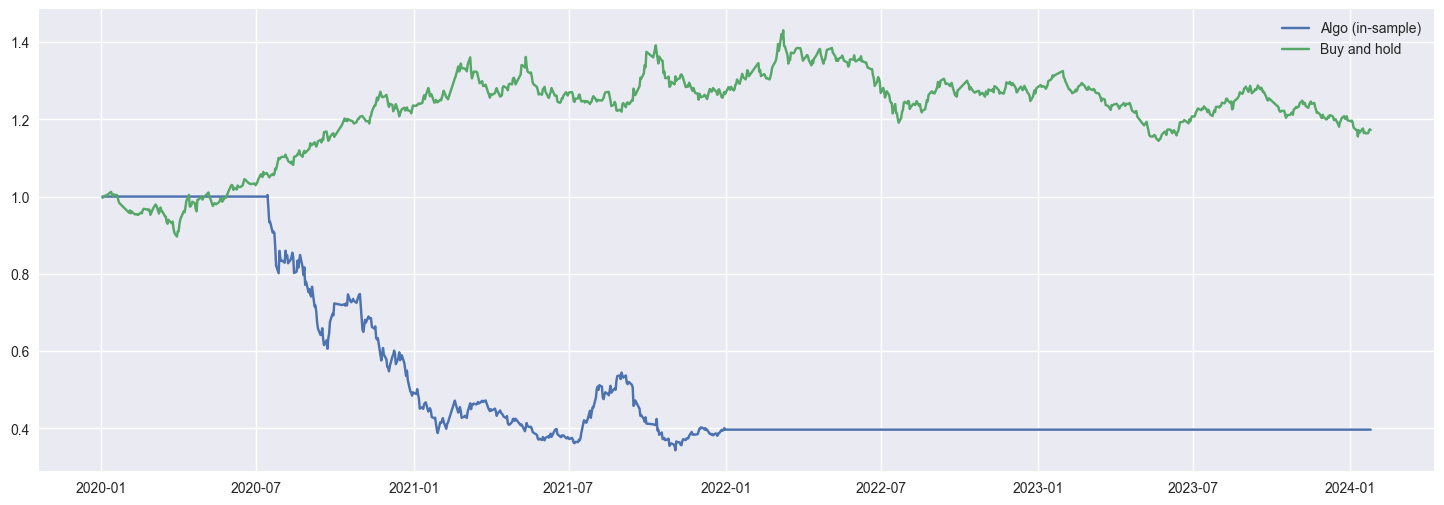

In [26]:
plt.figure(figsize=(18,6))
plt.plot(cumret_is_show, label='Algo (in-sample)')
plt.plot(cumret_bnh, label='Buy and hold')
plt.legend()

In [27]:
def calculate_metrics(cumret):
    '''
    calculate performance metrics from cumulative returns
    '''
    total_return = (cumret[-1] - cumret[0])/cumret[0]
    apr = (1+total_return)**(126/len(cumret)) - 1
    rets = pd.DataFrame(cumret).pct_change()
    sharpe = np.sqrt(126) * np.nanmean(rets) / np.nanstd(rets)
    
    # maxdd and maxddd
    highwatermark=np.zeros(cumret.shape)
    drawdown=np.zeros(cumret.shape)
    drawdownduration=np.zeros(cumret.shape)
    for t in np.arange(1, cumret.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
        drawdown[t]=cumret[t]/highwatermark[t]-1
        if drawdown[t]==0:
            drawdownduration[t]=0
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
    maxDD=np.min(drawdown)
    maxDDD=np.max(drawdownduration)
    
    return total_return, apr, sharpe, maxDD, maxDDD

In [28]:
def shuffle_positions(positions_df):
    # shuffle positions within each column
    for col in range(positions_df.shape[1]):
        split =  np.split(positions_df.iloc[:,col].values, np.where((np.diff(positions_df.iloc[:,col].values) != 0))[0]+1)
        pos = [x for x in split if x[0]!=0] # all non-zero positions
        pos_length = sum([len(x) for x in pos]) # total length in days
        zero_length = len(positions_df.iloc[:,col]) - pos_length
        pos += np.split(np.array([0]*zero_length), np.arange(1,zero_length))
        random.shuffle(pos)
        pos = np.concatenate(pos).astype(int)
        positions_df.iloc[:,col] = pos
    # convert the dataframe to numpy array
    positions = positions_df.values
    np.random.shuffle(np.transpose(positions))
    
    shuffled_df = pd.DataFrame(positions, index=positions_df.index, columns=positions_df.columns)
    
    return shuffled_df

In [34]:
bootstrap_trs = [] # total returns
N = 5000 # number of random tests

for _ in range(N):
    positions_bootstrap = shuffle_positions(positions)
    ret = (positions_bootstrap.shift() * returns[[s1,s2]]).sum(axis=1) * 2 # double the amount of capital
    cumret_bootstrap = np.nancumprod(ret+1)
    bootstrap_trs.append(calculate_metrics(cumret_bootstrap)[0]) # save total return
    
bootstrap_trs = np.array(bootstrap_trs)

In [35]:
results_df = pd.DataFrame(columns=['Total return', 'APR', 'Sharpe', 
                                   'maxDD', 'maxDDD', '% random portfolios beaten'])
total_return, apr, sharpe, maxDD, maxDDD = calculate_metrics(cumret_all[s1])
pct_beaten = 'NA'
results_df.loc[s1] = total_return, apr, sharpe, maxDD, maxDDD, pct_beaten
total_return, apr, sharpe, maxDD, maxDDD = calculate_metrics(cumret_all[s2])
results_df.loc[s2] = total_return, apr, sharpe, maxDD, maxDDD, pct_beaten
total_return, apr, sharpe, maxDD, maxDDD = calculate_metrics(cumret_bnh)
results_df.loc['Buy and hold'] = total_return, apr, sharpe, maxDD, maxDDD, pct_beaten

/var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/ipykernel_93477/2113416711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (cumret[-1] - cumret[0])/cumret[0]
/var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/ipykernel_93477/2113416711.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
/var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/ipykernel_93477/2113416711.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

In [36]:
total_return, apr, sharpe, maxDD, maxDDD = calculate_metrics(cumret_is)
pct_beaten = 100 * (1 - len(bootstrap_trs[bootstrap_trs>total_return]) / len(bootstrap_trs))
results_df.loc['Algo (in-sample)'] = total_return, apr, sharpe, maxDD, maxDDD, pct_beaten

In [37]:
results_df

Total return       APR    Sharpe     maxDD  maxDDD  \
PP                    0.133493  0.016125  0.182199 -0.301461   561.0   
C                     0.217970  0.025492  0.328227 -0.199641   425.0   
Buy and hold          0.175860  0.020896  0.278823 -0.200127   460.0   
Algo (in-sample)     -0.603276 -0.111325 -0.571719 -0.658181   861.0   

                 % random portfolios beaten  
PP                                       NA  
C                                        NA  
Buy and hold                             NA  
Algo (in-sample)                       2.64

In [38]:
def calculate_metrics_add(ret):
    '''
    calculate performance metrics from returns
    '''
    best_day = np.max(ret)
    worst_day = np.min(ret)
    pct_days_up = len(ret[ret>0]) / len(ret)
    pct_days_down = len(ret[ret<0]) / len(ret)
    avg_daily_gain = np.mean(ret[ret>0])
    sd_pos_ret = np.std(ret[ret>0])
    avg_daily_loss = np.mean(ret[ret<0])
    sd_neg_ret = np.std(ret[ret<0])
    
    return best_day, worst_day, pct_days_up, pct_days_down, avg_daily_gain, sd_pos_ret, avg_daily_loss, sd_neg_ret

In [39]:
metrics = ['Best day', 'Worst day', 'Percentage of up days', 'Percentage of down days', 
           'Average daily gain', 'SD of positive returns', 'Average daily loss', 
           'SD of negative returns']

results_add_df = pd.DataFrame(index=metrics, columns=['Algo (in-sample)', 'Buy and hold', s1,s2])

In [40]:
results_add_df['Algo (in-sample)'] = calculate_metrics_add(ret_is)
results_add_df['Buy and hold'] = calculate_metrics_add(ret_bnh)
results_add_df[s1] = calculate_metrics_add(returns[s1])
results_add_df[s2] = calculate_metrics_add(returns[s2])

In [41]:
results_add_df

Algo (in-sample)  Buy and hold        PP         C
Best day                         0.135591      0.043259  0.069365  0.033569
Worst day                       -0.123253     -0.030002 -0.065669 -0.030018
Percentage of up days            0.170213      0.505071  0.493414  0.510638
Percentage of down days          0.194529      0.494929  0.502533  0.468085
Average daily gain               0.018224      0.006009  0.009624  0.006072
SD of positive returns           0.017690      0.005520  0.009837  0.005024
Average daily loss              -0.020106     -0.005738 -0.009039 -0.006131
SD of negative returns           0.018274      0.004888  0.008616  0.005321

In [42]:
corr_df = pd.DataFrame(index=[s1,s2], columns=['Algo (in-sample)'])

for s in corr_df.index:
    corr_df.loc[s] = np.corrcoef(returns[s], ret_is.astype(float))[0,1]
    
corr_df

Algo (in-sample)
PP        -0.040421
C         -0.029458

In [43]:
returns[[s1,s2]].corr()

PP         C
PP  1.000000  0.119775
C   0.119775  1.000000

## 轮动生成交易信号

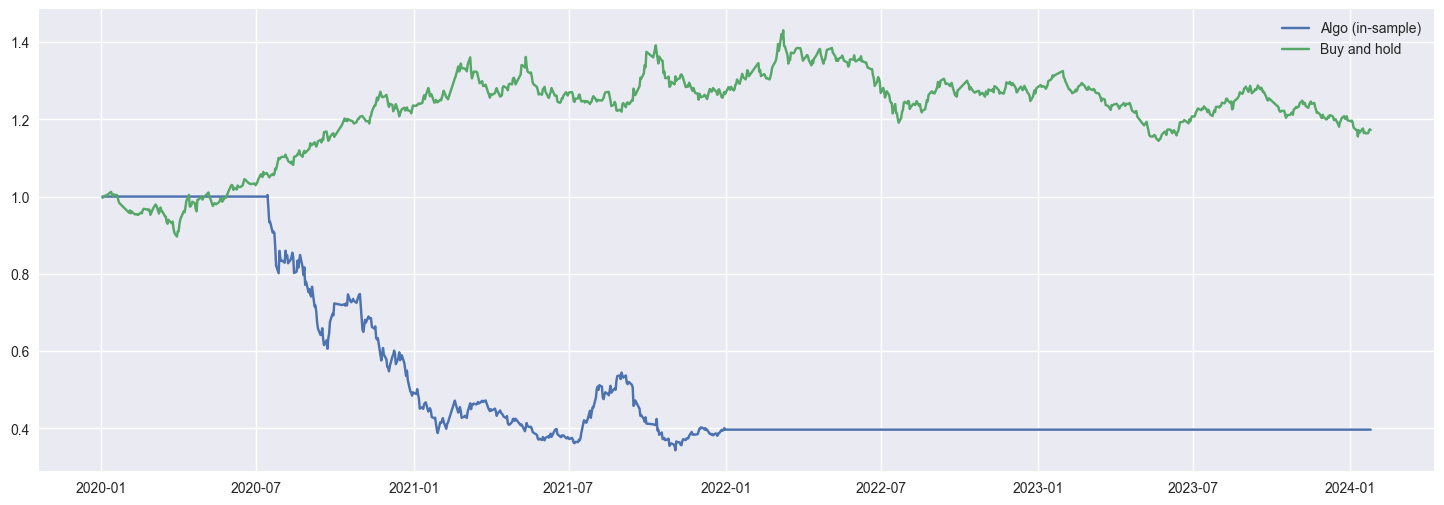

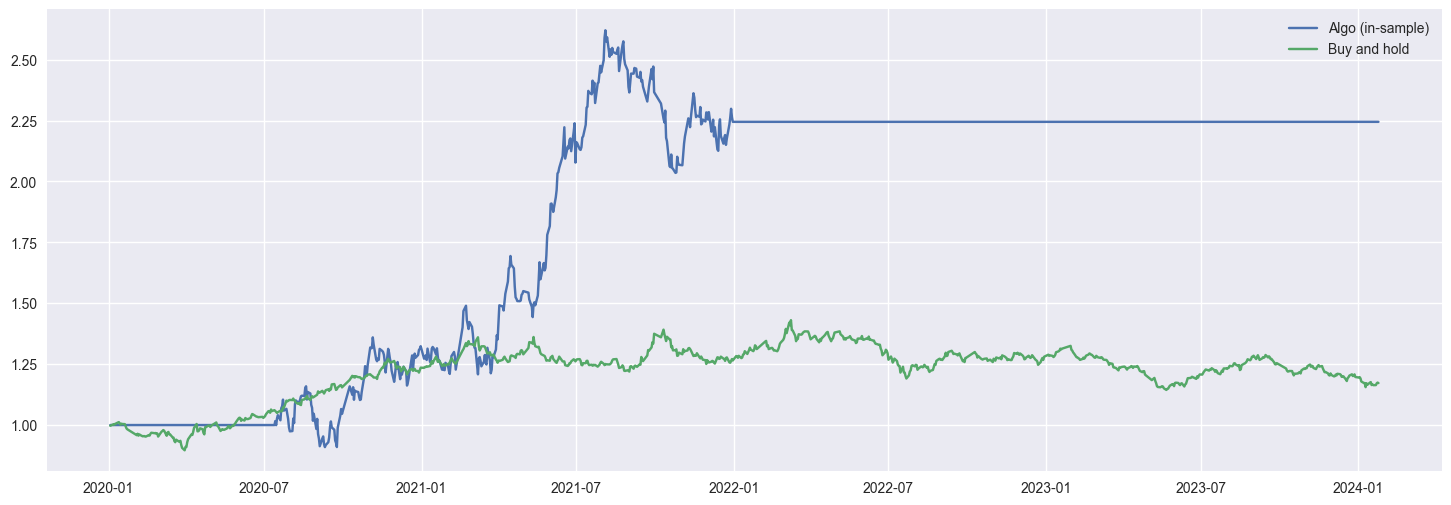

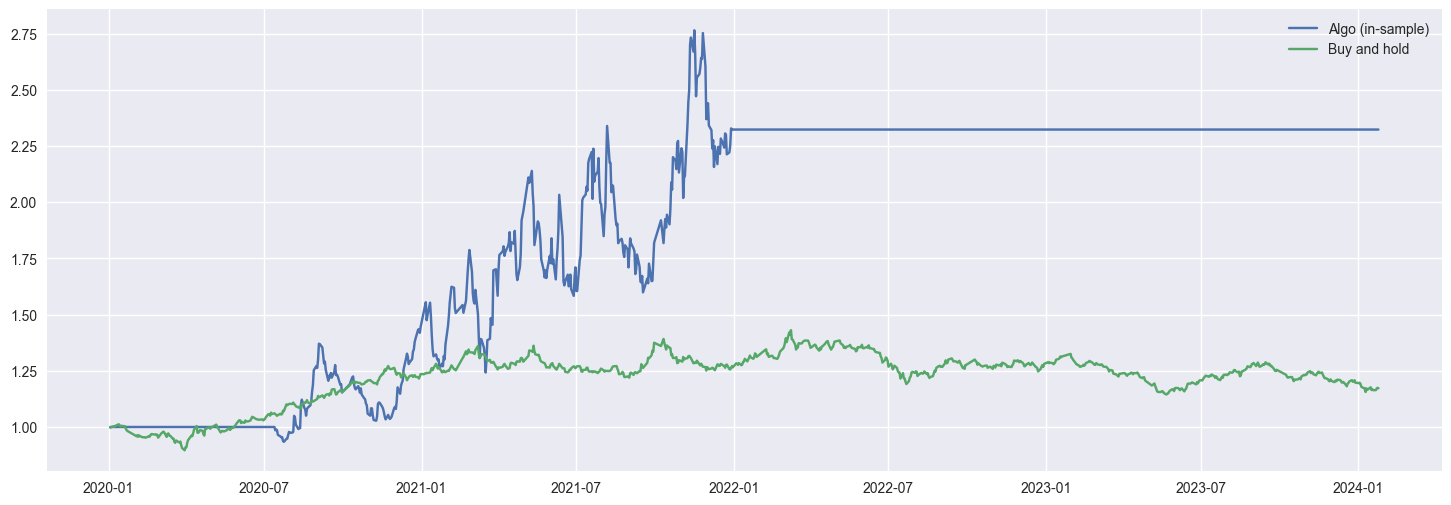

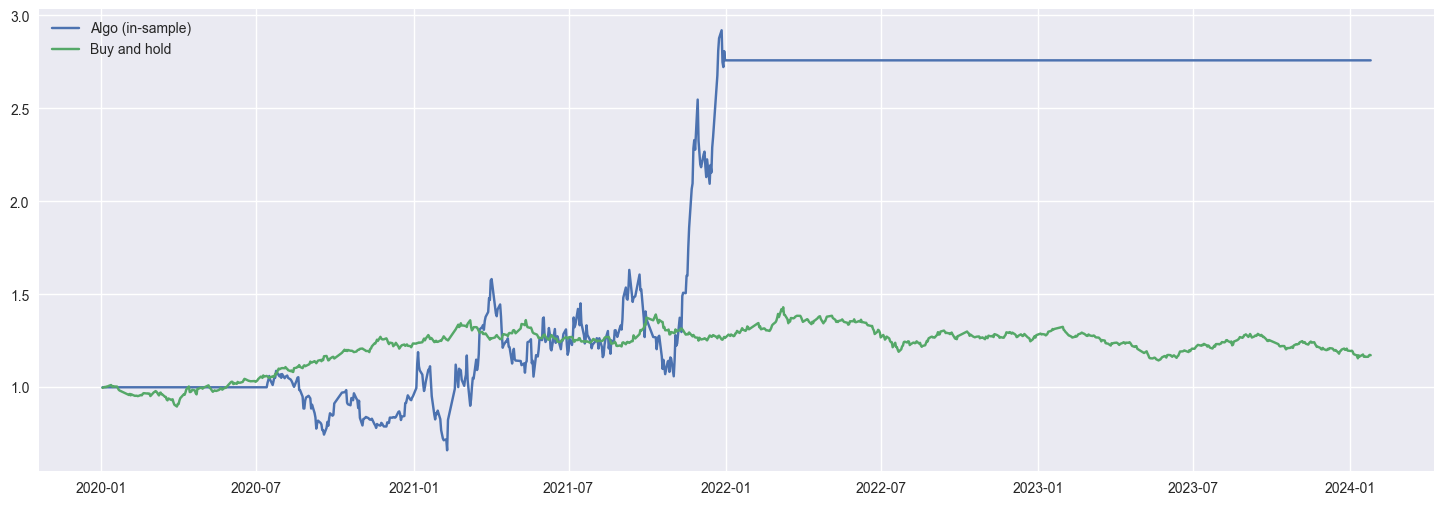

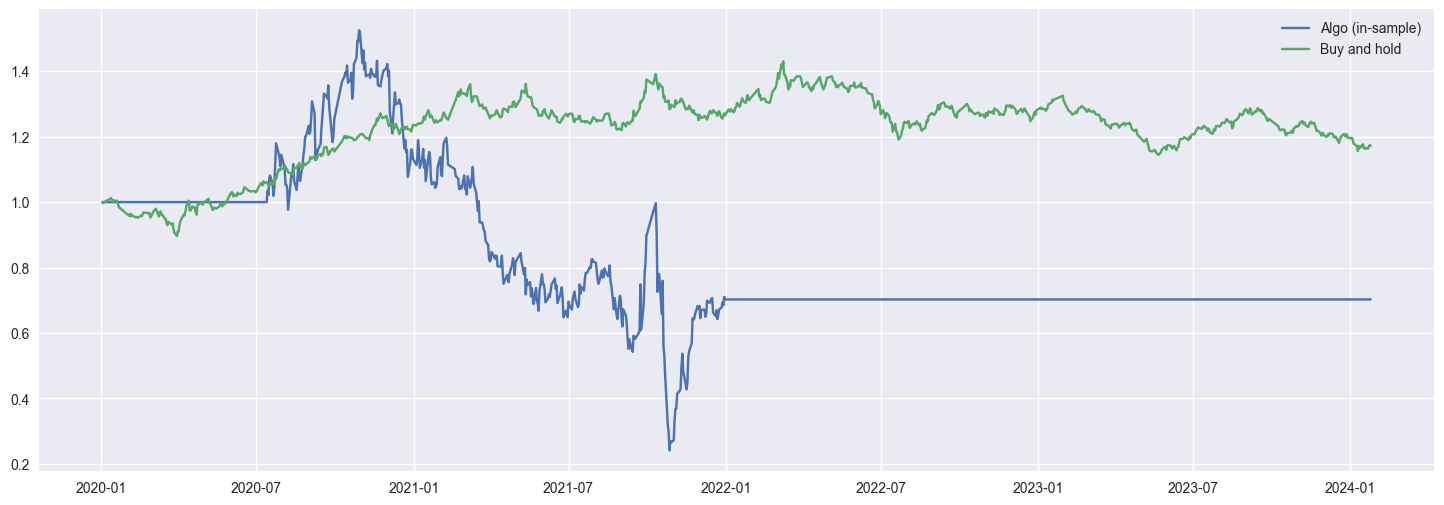

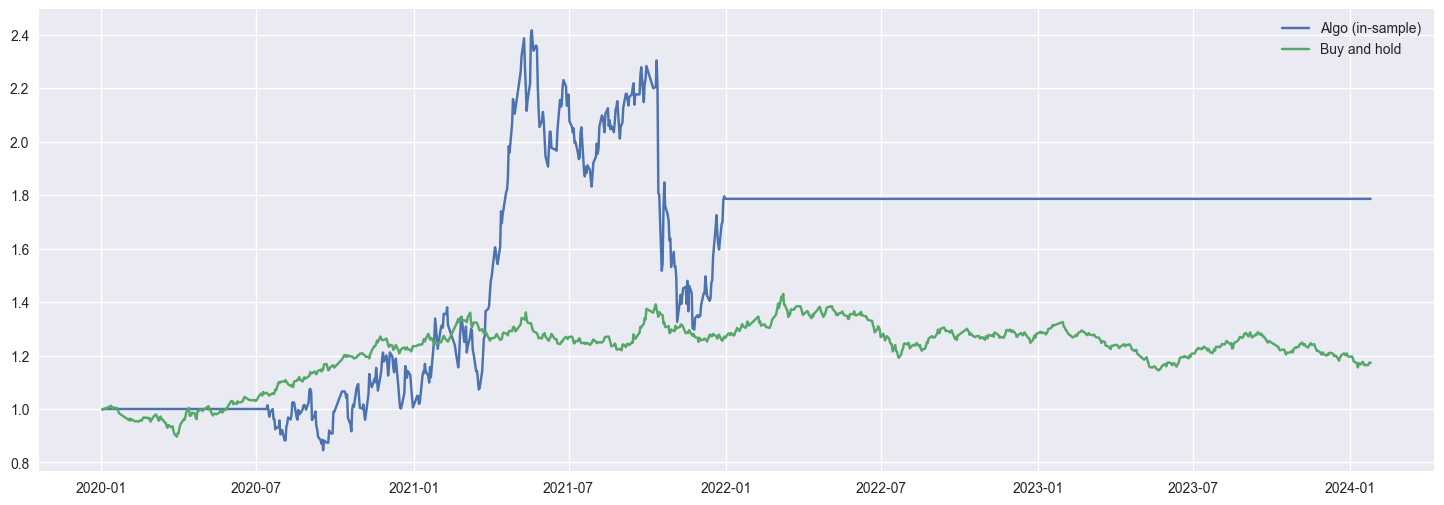

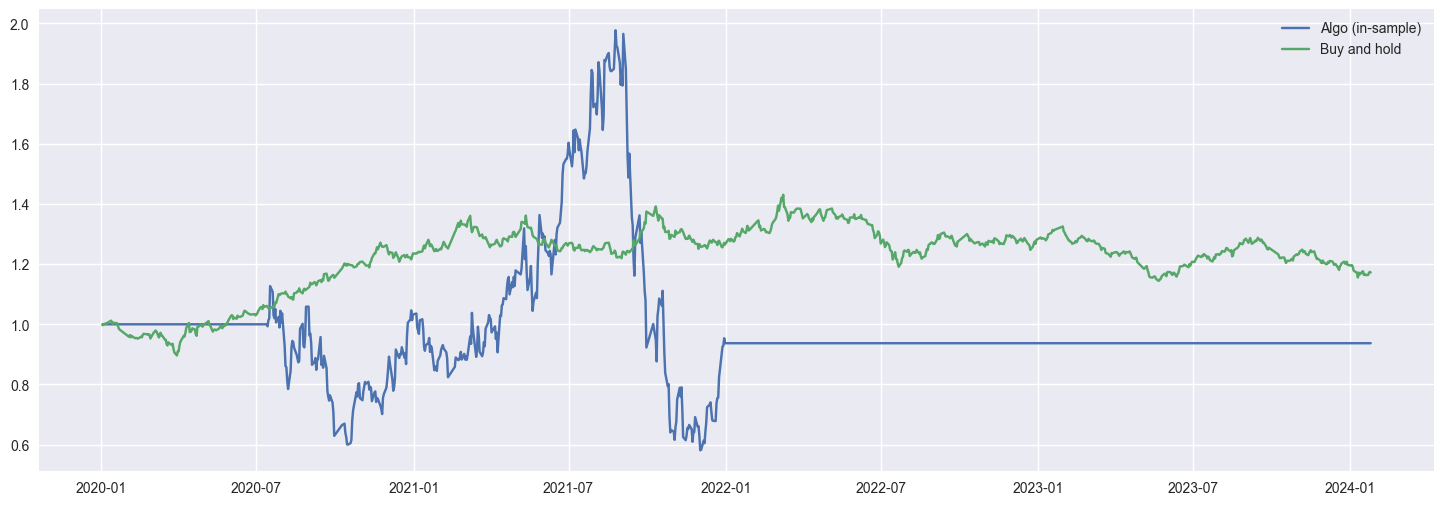

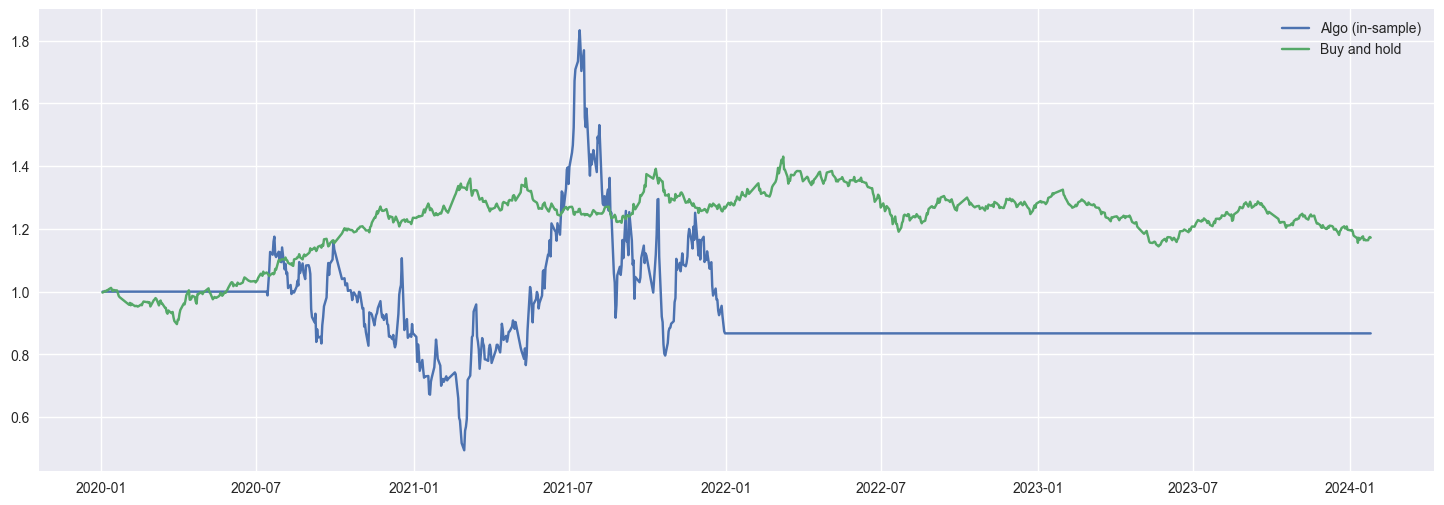

In [49]:
for pair in selected_pairs:
    s1,s2 = pair
    positions = Test_in_Sample(pair,log_prices, returns, '2020-01-01','2021-12-31')
    ret_is = (positions.shift() * returns[[s1,s2]]).sum(axis=1) * 2 # double the amount of capital
    cumret_is = np.nancumprod(ret_is+1)
    cumret_is_show = pd.DataFrame(cumret_is, index=cumret_bnh.index)
    plt.figure(figsize=(18,6))
    plt.plot(cumret_is_show, label='Algo (in-sample)')
    plt.plot(cumret_bnh, label='Buy and hold')
    plt.legend()
    plt.show()

In [48]:
def rolling_generate_signals(prices, selected_pair, drift, rolling_window, flag):
    selected_prices = prices[selected_pair]
    # generate signals for rolling window
    form_begin = datetime.strptime('2010-01-01','%Y-%m-%d') + timedelta(days=drift)
    form_begin = form_begin.strftime('%Y-%m-%d')
    form_end = datetime.strptime(form_begin,'%Y-%m-%d') + timedelta(days=rolling_window-1)
    form_end = form_end.strftime('%Y-%m-%d')
    prices_form = selected_prices.loc[form_begin:form_end]
    # prices_form = prices_form.dropna(axis=1,how='any')
    returns_form = prices_form.pct_change().dropna()
    log_prices_form = np.log(prices_form)
    positions = Test_in_Sample(selected_pair,log_prices_form,returns_form, form_begin,form_end)
    positions.fillna(method='ffill', inplace=True)
    positions.fillna(0, inplace=True)
    if(flag):
        return positions
    # 返回positions的最后一行
    return positions.tail(1)

In [45]:
from tqdm import tqdm
# prices = prices.dropna()
for drift in tqdm(range(0, 5011)):
    # merge positions
    if drift == 0:
        positions = rolling_generate_signals(prices, selected_pairs[0], drift, 126, 1)
        positions_all = positions
        continue
    else:
        positions = rolling_generate_signals(prices, selected_pairs[0], drift, 126, 0)
    positions_all = pd.concat([positions_all, positions], axis=0)

  0%|          | 0/5011 [00:00<?, ?it/s]/var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/ipykernel_93477/1173783192.py:10: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_form = prices_form.pct_change().dropna()
/var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/ipykernel_93477/1173783192.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  positions.fillna(method='ffill', inplace=True)
  0%|          | 1/5011 [00:00<11:28,  7.28it/s]/var/folders/44/1ps5l4vs4mj07yfyyfncjkcr0000gn/T/ipykernel_93477/1173783192.py:10: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling

In [295]:
# solve equations group
A = np.array([[0.2, -0.5, 1], [0.1, 0.2, 0], [0.2, 0.1, 0]])
b = np.array([[-400], [-200], [-100]])
# x not equal to 0
x = np.linalg.solve(A, b)
x

array([[    0.],
       [-1000.],
       [ -900.]])